You are the manager of a very successful bakery chain. Every few months, new items are introduced to the menu. In the past, the bakery chose to add items that could be made with whatever ingredients were leftover in the kitchen. However, you think this process could be improved upon. You recently got a hold of a dataset that shows sales records from the past few months at Keki’s bakery.

Data Cleaning: removing irrelevant columns, identifying typos, indentifying nulls and missing values, and removing duplicates

In [364]:
## import libraries 
import pandas as pd 
import numpy as np
from matplotlib import pyplot as plt 
import datetime 
from datetime import datetime
import calendar 
import warnings 
warnings.filterwarnings('ignore')
import seaborn as sns

In [399]:
## load dataframe and rename some columns 
df = pd.read_csv('Bakery Sales.csv')
df.rename(columns={'datetime': 'date of sale','total':'total sales', 'place': 'bakery name'}, inplace=True)

## remove all rows and columns with null values, and remove duplicate rows
df.dropna(subset=['date of sale'], inplace=True)
df.dropna(subset=['day of week'], inplace=True)
df.drop_duplicates(keep='first', inplace = True)

## convert 'date of sale' from string to datetime type
df['date of sale'] = pd.to_datetime(df['date of sale'], format="%Y-%m-%d %H:%M")

## make separate columns from datetime including: year, month, day, and time 
df['year of sale'] = df['date of sale'].dt.year
df['month of sale'] = df['date of sale'].dt.month
df['day of sale'] = df['date of sale'].dt.day
df['time of sale'] = df['date of sale'].dt.time

df['day of week comparison'] = df['date of sale'].dt.day_name()

## create a new column that holds the results for the test below 
df["matching days"] = None

## compare the two columns to see if they have matching days of the week 
for row in range(len(df)):
    b = df['day of week'].iloc[row] in df['day of week comparison'].iloc[row]
    df["matching days"].iloc[row] = b
df.head()

## count the number of matches
count_matches = df['matching days'].sum()
# print("total matches:", count_matches)

## count the number of mismatches 
count_mismatches = abs(count_matches - len(df["matching days"]))
#print("total mismatches:", count_mismatches)

## discover which rows are mismatches (aka where the date of sale does not match the day of week)
i = df[df['matching days'] == False].index[0]
df.drop(labels=i,inplace=True)

# after plotting the data as a boxplot, I noticed an outlier that was two orders of magnitude greater than any other sales day
# I will delete this item 
i = df.loc[df['total sales'] ==1293000.0].index
df.drop(i, inplace=True)
#df.drop(df.index[89])

Data Exploration 

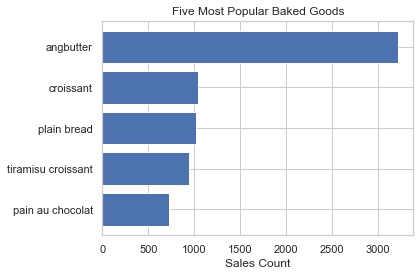

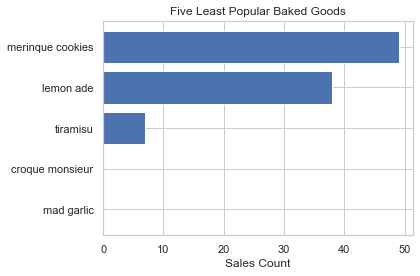

In [433]:
## Determine the number of sales for each item as well as the most popular baked good
items_sold = ['angbutter', 'plain bread', 'jam', 'americano',
       'croissant', 'caffe latte', 'tiramisu croissant', 'cacao deep',
       'pain au chocolat', 'almond croissant', 'croque monsieur', 'mad garlic',
       'milk tea', 'gateau chocolat', 'pandoro', 'cheese cake', 'lemon ade',
       'orange pound', 'wiener', 'vanila latte', 'berry ade', 'tiramisu',
       'merinque cookies']

## sum the entries in each column (thus axis = 1)
sales_counts = df[items_sold].sum(axis=0, skipna=True).sort_values(ascending=False)
total_items_sold = sales_counts.sum()
sales_percent = sales_counts/total_items_sold

# print(sales_counts)
# print('total sales = ', total_items_sold)
# # report sales_percent
# print(sales_percent)

# ## report results 
# print("Top 5 most popular items:")
# print("")
# print(sales_counts[0:6])
# print("")
# print("Most poular item = angbutter")
# print("")

## share top 5 results visually with bar chart 
x = sales_counts[0:5].index
height_x = sales_counts[0:5]

plt.barh(x, height_x)
plt.gca().invert_yaxis()
plt.title('Five Most Popular Baked Goods')
plt.xlabel('Sales Count')
plt.tight_layout()
plt.savefig('topfive.png')
plt.show()

## share bottom five results visually with bar chart
y = sales_counts[-5:].index 
height_y = sales_counts[-5:]
plt.barh(y, height_y)
plt.gca().invert_yaxis()
plt.title('Five Least Popular Baked Goods')
plt.xlabel('Sales Count')
plt.tight_layout()
#plt.xlim([0,3000])
plt.savefig('bottomfive.png')
plt.show()


season
winter    4812.0
fall      2937.0
summer    1942.0
spring    1115.0
dtype: float64
season
winter    44.530816
fall      27.179345
summer    17.971497
spring    10.318342
dtype: float64
descriptive count       4.000000
mean     2701.500000
std      1592.010574
min      1115.000000
25%      1735.250000
50%      2439.500000
75%      3405.750000
max      4812.000000
dtype: float64


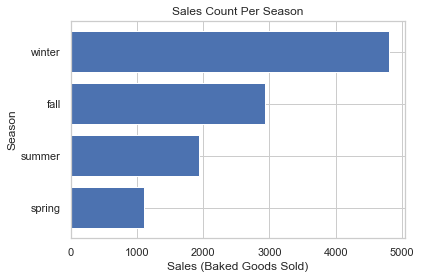

In [453]:
## determine which season of the year has the most items sold 
## cells in df['month of sale'] are numpy.int64 type 
spring_start = np.int64(4)
summer_start = np.int64(6)
fall_start = np.int64(9)
winter_start = np.int64(12)

df.loc[(df['month of sale'] >= spring_start) & (df['month of sale'] < summer_start), 'season'] = 'spring'
df.loc[(df['month of sale'] >= summer_start) & (df['month of sale'] < fall_start), 'season'] = 'summer'
df.loc[(df['month of sale'] >= fall_start) & (df['month of sale'] < winter_start), 'season'] = 'fall'
df.loc[(df['month of sale'] == winter_start) | (df['month of sale'] < spring_start), 'season'] = 'winter'

## find items sold and percent of sales in each season 
season_cts = df.groupby('season')[items_sold].sum()
season_cts = season_cts.sum(axis=1).sort_values(ascending=False)
print(season_cts.sort_values(ascending=False))
sales_percent= season_cts/total_items_sold*100
print(sales_percent.sort_values(ascending=False))

## print the descriptive statistics for seasons
print("descriptive", season_cts.describe())

## share results visually with bar chart 
y = season_cts.index
height_y = season_cts
plt.title('Sales Count Per Season')
plt.xlabel('Sales (Baked Goods Sold)')
plt.ylabel('Season')
plt.barh(y, height_y)
plt.gca().invert_yaxis()
plt.savefig('season.png')




season
winter    22460800.0
fall      13397600.0
summer     8868200.0
spring     5202100.0
Name: total sales, dtype: float64
season
winter    44.985750
fall      26.833465
summer    17.761728
spring    10.419058
Name: total sales, dtype: float64
         count          mean          std      min      25%      50%      75%  \
season                                                                          
fall     658.0  20361.094225  7484.696107  12800.0  15500.0  18000.0  22800.0   
spring   251.0  20725.498008  6356.866150  14000.0  16100.0  18800.0  24100.0   
summer   427.0  20768.618267  7977.085652  13100.0  15800.0  18300.0  23050.0   
winter  1082.0  20758.595194  8090.942679  13600.0  15800.0  18600.0  22800.0   

             max  
season            
fall     71800.0  
spring   64000.0  
summer   73200.0  
winter  116500.0  


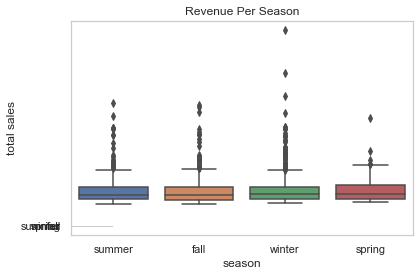

In [457]:
## find the percent of total revenue for each season 
## find items sold and percent of sales in each season 
season_revenue = df.groupby('season')['total sales'].sum()
total_revenue = df['total sales'].sum()
percent_revenue = season_revenue/total_revenue*100
print(season_revenue.sort_values(ascending=False))
print(percent_revenue.sort_values(ascending=False))

## 
r = df.groupby('season')['total sales']
print(r.describe())

## share results visually with bar chart 
y = season_revenue.index
height_y = season_revenue.sort_values(ascending = False)
plt.title('Revenue (in KRW) Per Season')
plt.xlabel('Revenue (in KRW)')
plt.ylabel('Season')
plt.barh(y, height_y)
plt.gca().invert_yaxis()
plt.savefig('season_revenue.png')

# use a box plot to show descriptive statistics
#ax.set(ylim=(0,3000))
plt.gca().invert_yaxis()
sns.set_style("whitegrid")
ax = sns.boxplot(x= df['season'], y=df['total sales']).set(title='Revenue Per Season')
plt.tight_layout()
plt.savefig('box_plot_season.png')
plt.show()



month of sale
2     1380.0
3     1379.0
8     1340.0
12    1074.0
9     1071.0
4     1050.0
11     994.0
1      979.0
10     872.0
7      602.0
5       65.0
dtype: float64
              angbutter                                                \
                  count      mean       std  min  25%  50%  75%   max   
month of sale                                                           
1                 171.0  1.754386  1.442392  1.0  1.0  1.0  2.0  10.0   
2                 241.0  1.622407  1.104232  1.0  1.0  1.0  2.0  10.0   
3                 249.0  1.618474  0.989369  1.0  1.0  1.0  2.0   7.0   
4                 195.0  1.594872  0.888050  1.0  1.0  1.0  2.0   5.0   
5                  11.0  1.727273  1.190874  1.0  1.0  1.0  2.0   4.0   
7                 120.0  1.500000  0.859939  1.0  1.0  1.0  2.0   5.0   
8                 247.0  1.740891  1.218784  1.0  1.0  1.0  2.0   9.0   
9                 194.0  1.737113  1.294854  1.0  1.0  1.0  2.0  11.0   
10                161.0  

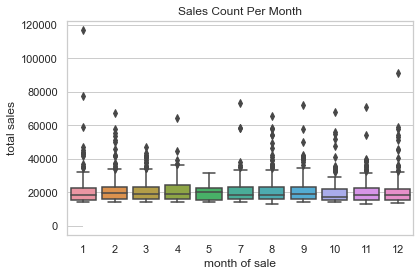

In [460]:
## determine what months have the highest and lowest sales
month_cts = df.groupby('month of sale')[items_sold].sum()
month_cts.head()
month_cts = month_cts.sum(axis=1).sort_values(ascending=False)
month_cts
print(month_cts)

# 
m = df.groupby('month of sale')[items_sold]
print(m.describe())

## share results visually with bar chart 
y = month_cts.index
height_y = month_cts
plt.title('Sales Count Per Month')
plt.xlabel('Sales')
plt.ylabel('Months')
plt.barh(y, height_y)
plt.gca().invert_yaxis()
plt.savefig('month.png')

# # use a box plot to show descriptive statistics
# #ax.set(ylim=(0,3000))
# plt.gca().invert_yaxis()
# sns.set_style("whitegrid")
# ax = sns.boxplot(x= df['season'], y=df['total sales']).set(title='Revenue Per Season')
# plt.tight_layout()
# plt.savefig('box_plot_season.png')
# plt.show()


# use a box plot to show descriptive statistics
df.columns
#ax.set(ylim=(0,3000))
plt.gca().invert_yaxis()
ax = sns.boxplot(x= df['month of sale'], y=df['total sales'])
plt.tight_layout()
plt.savefig('box_plot_month.png')



PART 2, STEP 2: Get the total sales for each day of the week to see which day is the most profitable

day of week
Sun     2437.0
Sat     1979.0
Thur    1764.0
Wed     1633.0
Fri     1497.0
Mon     1484.0
Tues      12.0
dtype: float64

Most poular day of the week = Sunday



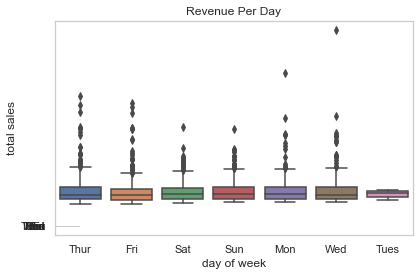

In [462]:
## Get the total sales for each day of the week to see which day is the most profitable

items_per_day = df.groupby(['day of week'])[items_sold].sum()

## find the total items sold each day of the week (we don't care about type of item here)
total_sold_per_day = items_per_day.sum(axis=1, skipna=True).sort_values(ascending=False)


## report findings 
print(total_sold_per_day)
print('')
print("Most poular day of the week = Sunday")
print("")

## share results visually with bar chart 
y = total_sold_per_day.index
height_y = total_sold_per_day
plt.title('Total Sales Per Day')
plt.xlabel('Sales Count')
plt.barh(y, height_y)
plt.gca().invert_yaxis()
plt.savefig('days.png')

# use a box plot to show descriptive statistics
#ax.set(ylim=(0,3000))
plt.gca().invert_yaxis()
sns.set_style("whitegrid")
ax = sns.boxplot(x= df['day of week'], y=df['total sales']).set(title='Revenue Per Day')
plt.tight_layout()
plt.savefig('box_plot_day.png')
plt.show()


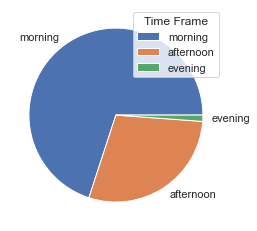

In [466]:
## Get the total sales for different times of the day to see which time is the most profitable

# instantiate an empty column where I will put converted times to timeframes (morning, afternoon, or evening)
df.loc[df['time of sale'] < time(11,59,00), 'time frame'] = 'morning'
df.loc[df['time of sale'] > time(17,00,00), 'time frame'] = 'evening'
df.loc[(df['time of sale'] >= time(12,00,00)) & (df['time of sale'] <= time(16,59,59)), 'time frame'] = 'afternoon'

# find sales counts in morning, afternoon, and evening
## Get the total sales for each day of the week to see which day is the most profitable

sales_by_time = df.groupby(['time frame'])[items_sold].sum()


## find the total items sold each day of the week (we don't care about type of item here)
total_sales_by_time = sales_by_time.sum(axis=1, skipna=True).sort_values(ascending=False)
total_sales_by_time


# # plot data with bar graph 
# t = total_sales_by_time.index
# height_t = total_sales_by_time
# plt.title('Sales Count For Times of The Day')
# plt.xlabel('Sales')
# plt.ylabel('Time of Day')
# plt.barh(t, height_t)
# plt.gca().invert_yaxis()
# plt.savefig('day.png')

# plot data with pie chart 
mylabels = ["morning", "afternoon", "evening"]

plt.pie(time_cts, labels = mylabels)
plt.legend(title="Time Frame")
plt.savefig('pie_chart.png')
plt.show()



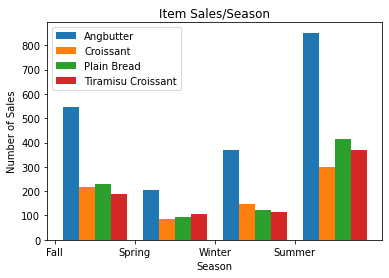

In [255]:
# How many of each item were sold in different seasons 
items_in_season = pd.DataFrame(columns = ['season'])
for i in range(len(items_sold)):
    items_in_season[items_sold[i]] = df.groupby('season').agg(
        count = (items_sold[i], 'count'),
    )
items_in_season['angbutter']

# plot sales of top five items 
X = ['Fall', 'Spring', 'Winter', 'Summer']
item1 = items_in_season['angbutter']
item2 = items_in_season['croissant']
item3 = items_in_season['plain bread']
item4 = items_in_season['tiramisu croissant']
item5 = items_in_season['pain au chocolat']

X_axis = np.arange(len(X))

plt.bar(X_axis + 0.2, item1, 0.2, label = 'Angbutter')
plt.bar(X_axis + 0.2*2, item2, 0.2, label = 'Croissant')
plt.bar(X_axis + 0.2*3, item3, 0.2, label = 'Plain Bread')
plt.bar(X_axis + 0.2*4, item4, 0.2, label = 'Tiramisu Croissant')
#plt.bar(X_axis + 0.2*5, item5, 0.2, label = 'Pain Au Chocolat')

plt.xticks(X_axis, X)
plt.xlabel("Season")
plt.ylabel("Number of Sales")
plt.title("Item Sales/Season")
plt.legend()
plt.show()


Analysis on Bakery Locations

In [269]:
# Bakery location information 
print('Total number of bakeries:', df['bakery name'].nunique())
print('Bakery names', df['bakery name'].unique())


Total number of bakeries: 19
Bakery names [nan '효자 3동' '후평 1동' '후평 2동' '석사동' '소양동' '퇴계동' '동면' '후평 3동' '신사우동' '강남동'
 '효자 1동' '조운동' '교동' '효자 2동' '약사명동' '근화동' '동내면' '교동 ' '신동면']


In [464]:
#what are the most and least sucessful bakery locations in terms of sales numbers? 
total_revenue = df['total sales'].sum()
bakery_revenue = df.groupby('bakery name')['total sales'].sum()
percent_revenue = bakery_revenue/total_revenue*100
percent_revenue.sort_values(ascending=False)

percent_revenue.sort_values(ascending=False)
#print('the highest performing bakery is:', percent_revenue.sort_values(ascending=False).index[0])

bakery name
동면       17.090171
후평 2동     9.861262
후평 3동     9.609303
후평 1동     8.171853
석사동       7.917490
퇴계동       6.539125
효자 2동     5.726766
소양동       5.275122
신사우동      4.237843
효자 3동     2.961223
교동        2.426260
강남동       2.195531
효자 1동     2.103199
조운동       1.634931
동내면       1.473701
근화동       1.179883
약사명동      1.023660
교동        0.072503
신동면       0.052275
Name: total sales, dtype: float64

PART 3: Gather Insights with Statistics

PART 3, STEP 1-A: Identify the most and least profitable days (where profit is defined as the total number of baked goods sold) in December, 2019 

In [133]:
## create a new data frame with only entries from December 2019 
december = df.loc[(df['date of sale'].dt.month==12) & (df['date of sale'].dt.year==2019)]

## sum sales per row 
december['total sales per row'] = december[items_sold].sum(axis=1, skipna=True)

## test on December first. Should = 61 sales 
december.loc[december['date of sale'].dt.day == 1,'total sales per row'].sum()
## test works 

## calculate the total sales each day (aka total sales for 12/1, 12/2 etc) *this there a more elegant way to do this? 
sales_per_day=[]

## add total sales/day to the list 'sales_per_day'
for i in range(1,31):
      sales_per_day.append(december.loc[december['date of sale'].dt.day==i,'total sales per row'].sum())

## add each element in sales per day to the corresponding row in the december sales dataframe 
for i in range(1,31):
       december.loc[december['date of sale'].dt.day==i, 'total sales per day'] = sales_per_day[i-1]

## return the days in 12/2019 with the highest and lowest sales count 
## RESULT: 12/08/2019 had the highest sales count at 90 items sold, and 12/27/2019 had the lowest sales count at 90 items sold
print('The most profitable and least profitable days in 12/2019:')
print(december[['date of sale', 'total sales per day']].sort_values(by='total sales per day', ascending=False).iloc[0])
print("")
print(december[['date of sale', 'total sales per day']].sort_values(by='total sales per day', ascending=True).iloc[0])
print("")


The most profitable and least profitable days in 12/2019:
date of sale           2019-12-08 12:52:00
total sales per day                   90.0
Name: 1157, dtype: object

date of sale           2019-12-27 12:49:00
total sales per day                   11.0
Name: 1293, dtype: object



PART 3, STEP 1-B: calculate the average amount sold every day of the week in 12/2019

Average amount sold for each day of the week in 12/2019:
day of week
Fri     30.961538
Mon     34.777778
Sat     53.186047
Sun     62.882353
Thur    40.125000
Tues    12.000000
Wed     41.055556
Name: total sales per day, dtype: float64


<BarContainer object of 7 artists>

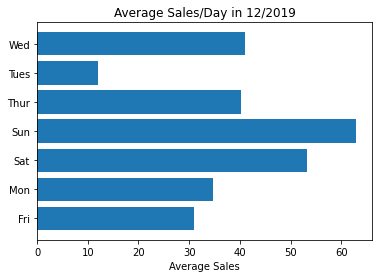

In [134]:
## calculate the average amount sold every day of the week in 12/2019  
december_avg = december.groupby(['day of week'])['total sales per day'].mean()
print('Average amount sold for each day of the week in 12/2019:')
print(december_avg)

## share results visually with bar chart 
a = december_avg.index
height_a = december_avg
plt.title('Average Sales/Day in 12/2019')
plt.xlabel('Average Sales')
plt.barh(a, height_a)

PART 3, STEP 1-C: Create a breakdown for each timeframe: morning, afternoon, and evening. 

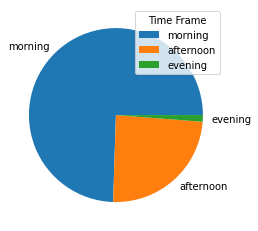

In [135]:
from datetime import time 

# make a column with just the time 
december['time of sale'] = december['date of sale'].dt.time

# instantiate an empty column where I will put converted times to timeframes (morning, afternoon, or evening)
december.loc[december['time of sale'] < time(11,59,00), 'time frame'] = 'morning'
december.loc[december['time of sale'] > time(17,00,00), 'time frame'] = 'evening'
december.loc[(december['time of sale'] >= time(12,00,00)) & (december['time of sale'] <= time(16,59,59)), 'time frame'] = 'afternoon'

# find sales counts in morning, afternoon, and evening in december
time_cts = december['time frame'].value_counts()
mylabels = ["morning", "afternoon", "evening"]

plt.pie(time_cts, labels = mylabels)
plt.legend(title="Time Frame")
plt.savefig('pie_chart.png')
plt.show()


PART 3, STEP 1-C: Create a breakdown of the sales for each timeframe: morning, afternoon, and evening.

In [122]:
# strategy: make a new column called "time of day" with the entries = morning, afternoon, or evening. Then essentially do this: items_per_day = df.groupby(['day of week'])[items_sold].sum()
# heads up: I don't think it makes sense. I thought the timestamp corresponded to only the time the sales of all items at are particular bakery
# were logged, not necessarily the time a particular item sold. 

PART 3, STEP 2: Create and interpret a scatterplot of date and sales. 

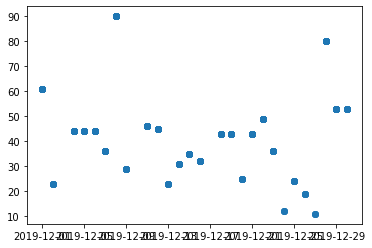

In [123]:
december['date no time'] = december['date of sale'].dt.date
d = december.copy()
d.drop_duplicates(subset=['date no time'], keep="first")

plt.scatter(d['date no time'], d['total sales per day'])
plt.show()

PART 3, STEP 3: Keki’s Bakery is looking to maintain (and potentially increase) their high-traffic and high-sales days, as well as boost their sales on their lowest traffic days. 

10837.0
Three most popular baked goods

angbutter      3228.0
croissant      1049.0
plain bread    1028.0
dtype: float64

Three least popular baked goods

mad garlic         0.0
croque monsieur    0.0
tiramisu           7.0
dtype: float64


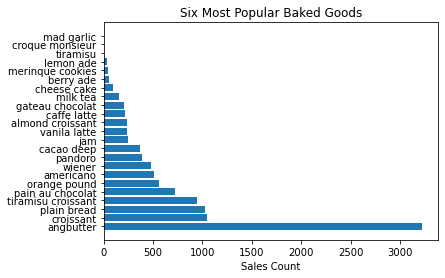

In [132]:
## sum the entries in each column (thus axis = 1)
df_sales_counts = df[items_sold].sum(axis=0, skipna=True).sort_values(ascending=False)

## report results 
print("Three most popular baked goods")
print("")
print(df_sales_counts.sort_values(ascending=False)[0:3])
print("")
print("Three least popular baked goods")
print("")
print(df_sales_counts.sort_values(ascending=True)[0:3])

## share results visually with bar chart 
x = df_sales_counts.index
height_x = df_sales_counts
plt.barh(x, height_x)
plt.title('Six Most Popular Baked Goods')
plt.xlabel('Sales Count')
plt.show()

In [135]:
# % of sales of each item
years_sales = df_sales_counts.sum()

percent_sales = df_sales_counts/years_sales 
print(percent_sales)

angbutter             0.297868
croissant             0.096798
plain bread           0.094860
tiramisu croissant    0.087109
pain au chocolat      0.066993
orange pound          0.052228
americano             0.047338
wiener                0.043924
pandoro               0.036265
cacao deep            0.033589
jam                   0.022977
vanila latte          0.022239
almond croissant      0.021685
caffe latte           0.019747
gateau chocolat       0.019378
milk tea              0.014764
cheese cake           0.008489
berry ade             0.005075
merinque cookies      0.004522
lemon ade             0.003507
tiramisu              0.000646
croque monsieur       0.000000
mad garlic            0.000000
dtype: float64


PART 3, STEP 4-A:
What percentage of sales does the bottom ranking pastry make up for a given week?


In [125]:
# If there were no sales of mad gralic or croque monsieur throughout our entire dataset (which spans about a year), the % of sales they make up in a given week must have to be zero. 

PART 3, STEP 4-B: Create a multi-line graph to track one of the lowest the pastry’s performance throughout the three months. Each
line should be a day of the week.

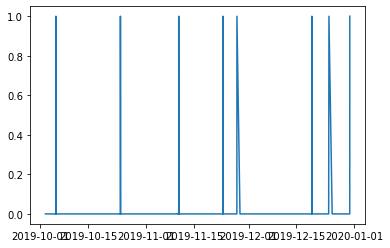

In [126]:
# select the months october, november, and december 2019 
## Determine the number of sales for each item as well as the most popular baked good

# create a dataframe with just data from the months october, november, december of 2019 
three_months = df.loc[(df['date of sale'].dt.month==10) | (df['date of sale'].dt.month==11) | (df['date of sale'].dt.month==12) & (df['date of sale'].dt.year==2019)]
three_months[items_sold].sum(axis=0).sort_values(ascending = True)

# it looks like one of the lowest selling items (beside the items that sold nothing, like mad garlic, tiramisu, and croque monsieur) were merinque cookies

# plot the sales of merinque cookies over the three month interim on a line graph 
x_Axis = three_months['date of sale']
y_Axis = three_months['merinque cookies'].fillna(0)
#y_Axis = three_months['merinque cookies'].fillna(0)
plt.plot(x_Axis, y_Axis)


STEP 4 - Part 1: What percentage of sales does the bottom ranking pastry make up for a given week?
